# Assessment 2B: Comparing the efficiency of several convoluted neural network models in classifying the FashionMNIST
## Introduction
### Neural Network Model (Convoluted neural network)
A convoluted neural network (CNN) is a deep learning model that is specifically designed for processing and classifying visual data (such as the FashionMNIST dataset I used). I first learned about CNNs while conducting my own experimentation with PyTorch neural networks and encountering a tutorial on creating a simple CNN with PyTorch. CNNs are computationally expensive for large and deep networks, meaning I had to limit the scale of my project; this turned out to be a benefit, as it forced me to stay within a realistic scope.

The main advantage of CNNs is their accuracy without human supervision; CNNs are able to extract visual features that other deep learning models may not while remaining relatively computationally efficient. Part of this effiency is a result of hierarchical feature learning; as CNNs are designed with multiple layers that build upon the features learned in previous layers, initial layers do not have to capture complex features. 
This means the computation required per layer is lower; the computations themselves are also efficient, as convolution operations involve mathematical operations with shared weights as opposed to the matrix multiplication in traditional neural networks. Because the same parameters are used for different positions on the image, there is no need to compute and store the parameters for each position, thereby significantly reducing the number of paramters and computations required on each layer. 

This was my first time exploring CNNs, but I have been interested in the topic of visual deep learning for a while now as I find the subject extremely promising and interesting. Especially with the advent of new, easily accessible AI image generation in my opinion it is vital to understand how these kinds of systems function. I had to heavily rely on ChatGPT and various Internet sources such as TowardsDataScience and the PyTorch documentation in order to even slightly understand the topic, but I feel that I understand these kinds of networks far more now than I did when I started this subject. 

## Building a CNN to classify the FashionMNIST dataset
### Part 1: Understanding the elements of a CNN
#### 1A: Components of a CNN
##### Convolutional Layers
The name "convoluted neural network" comes from the core of a CNN: the convolutional layers. These layers use mathematical operations called *convolution operations* to extract patterns out of images. Convolutional layers are crucial in extracting the details and features from input data.

### Part 2: Designing the model(s)
#### 2A: Input data, parameters and weights
A vital step in building a deep learning model is to set the initial parameters/weights of the model. The FashionMNIST dataset contains 28x28 greyscale images: these images can first be normalized to range [0,1], then be converted to 2D tensors, where each element in the tensor corresponds to the pixel intensity at a specific position. 

##### Determining the output size of feature maps at each layer
In the context of CNNs, the formula $$[(W−K+2P)/S]+1$$ is used to calculate the output size of a feature map after applying a convolution operation.

### Part 3: Building the model
#### 3A: Libraries, imports, etc
This part can be disregarded as it is just importing libraries and the FashionMNIST dataset. The libraries being used are `PyTorch`, `TensorFlow` and `Matplotlib`.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

4422102/4422102 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                           

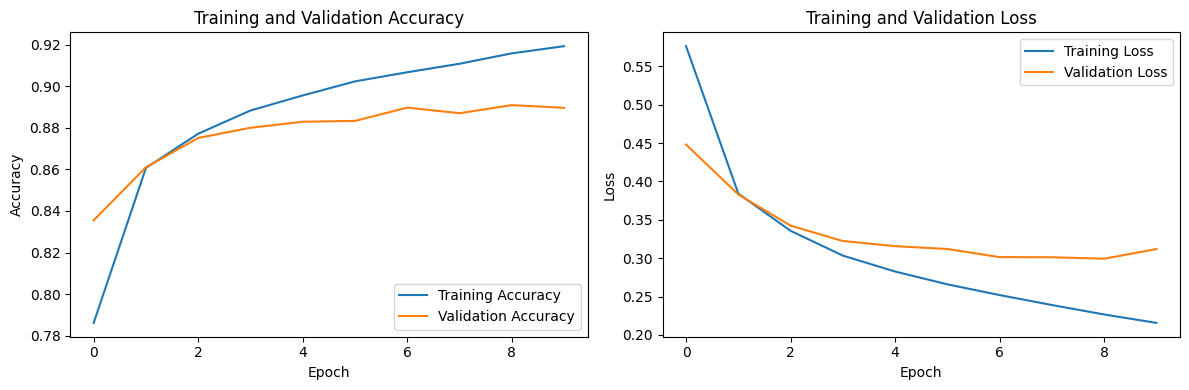

313/313 - 1s - loss: 0.3118 - accuracy: 0.8896 - 767ms/epoch - 2ms/step

Test accuracy: 0.8895999789237976
313/313 [==============================] - 1s 2ms/step


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the FashionMNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10, 
                    validation_data=(test_images[..., tf.newaxis], test_labels))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images[..., tf.newaxis])

# You can use predictions for further analysis or visualization if needed


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5531 - accuracy: 0.7949 - val_loss: 0.3994 - val_accuracy: 0.8522
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3613 - accuracy: 0.8662 - val_loss: 0.3409 - val_accuracy: 0.8753
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3187 - accuracy: 0.8838 - val_loss: 0.3274 - val_accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2908 - accuracy: 0.8925 - val_loss: 0.3268 - val_accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2715 - accuracy: 0.8993 - val_loss: 0.3034 - val_accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2539 - accuracy: 0.9062 - val_loss: 0.2916 - val_accuracy: 0.8937
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2415 - accuracy: 0.9099 - val_loss: 0.3038 - val_ac

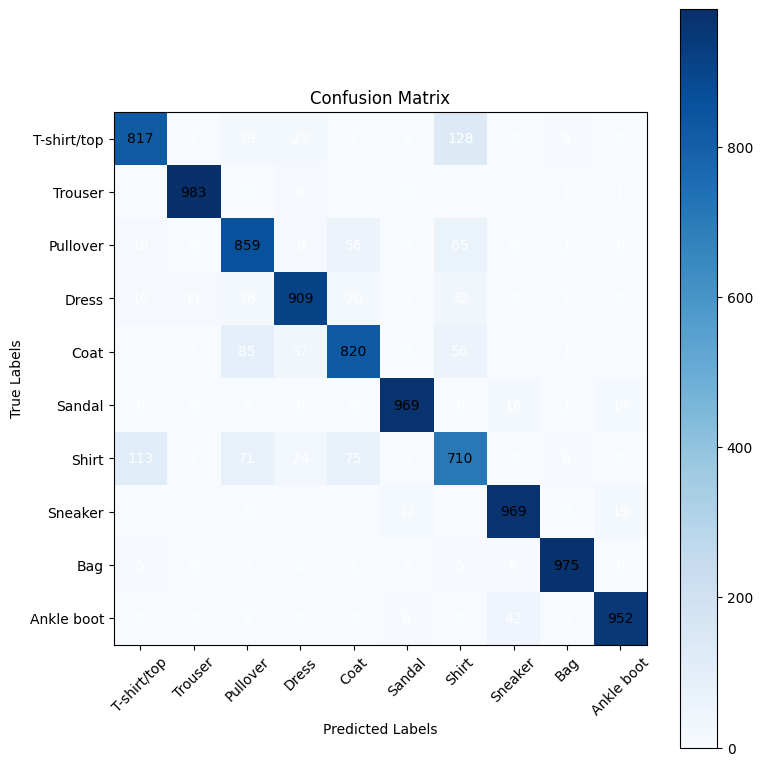

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Define class labels for FashionMNIST dataset
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Load and preprocess the FashionMNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10, 
                    validation_data=(test_images[..., tf.newaxis], test_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images[..., tf.newaxis])

# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Display the classification rates in the matrix
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion_mat[i, j]), ha="center", va="center", color="white" if i != j else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()
